In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')
df

<ipython-input-2-b9d8c7fa19de>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')


,listing_type,property_type,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,title_clean,description_length,description_word_count,description_sentence_count,title_length,title_word_count,stopword_ratio,price_per_sqm,total_amenities,price_normalized
0,residential-sell,apartment,tehran,gholhak,2024-05-01,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,...,قلهک فول امکانات,0.062822,0.033223,1.0,0.275862,0.12,0.0,3.187500e-07,3,1.698000e-06
1,residential-rent,apartment,tehran,tohid,2024-10-01,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,...,آپارتمان خوابه,0.015448,0.009967,1.0,0.241379,0.08,0.0,5.113636e-08,3,5.980000e-07
2,commercial-rent,office,tehran,elahiyeh,2024-06-01,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,...,فرشته دفتر کار مدرن موقعیت اداری,0.156540,0.096346,1.0,0.551724,0.24,0.0,9.500000e-08,2,7.580000e-07
3,residential-sell,apartment,mashhad,emamreza,2024-05-01,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,...,متری شمالی آفتاب اکبری,0.311020,0.182724,1.0,0.379310,0.16,0.0,1.125000e-07,6,1.148000e-06
4,residential-rent,apartment,ahvaz,mellirah,2024-09-01,NaN,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,6000000.0,...,اپارتمان متری ملی واحد جلو,0.161689,0.096346,1.0,0.448276,0.20,0.0,3.375000e-08,3,2.980000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768267,residential-sell,apartment,eslamshahr,NaN,2024-11-01,NaN,متریال استفاده شده در نما بهترین نوع با جزئیات...,اپارتمان ۱۰۵ متری خ مطهری,NaN,NaN,...,اپارتمان متری خ مطهری,0.245108,0.139535,1.0,0.362069,0.16,0.0,9.321428e-08,7,8.680000e-07
768268,residential-rent,apartment,mashhad,elahiyehblvd,2024-06-01,مشاور املاک,با سلام \n50متر یکخوابه \nطبقه اول \nجای پارک ...,50متر یکخوابه حاشیه اقدسیه,مقطوع,2000000.0,...,یکخوابه حاشیه اقدسیه,0.142122,0.083056,1.0,0.344828,0.12,0.0,4.050000e-08,4,1.780000e-07
768269,residential-sell,apartment,kermanshah,NaN,2024-07-01,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,NaN,...,آپارتمان متری وحدت غربی,0.144181,0.079734,1.0,0.396552,0.16,0.0,9.337500e-08,3,1.492000e-06
768270,residential-rent,apartment,tehran,darya,2024-07-01,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,45000000.0,...,آپارتمان متری سعادت آباد دریا,0.107106,0.066445,1.0,0.500000,0.20,0.0,8.181818e-08,3,7.980000e-07


In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

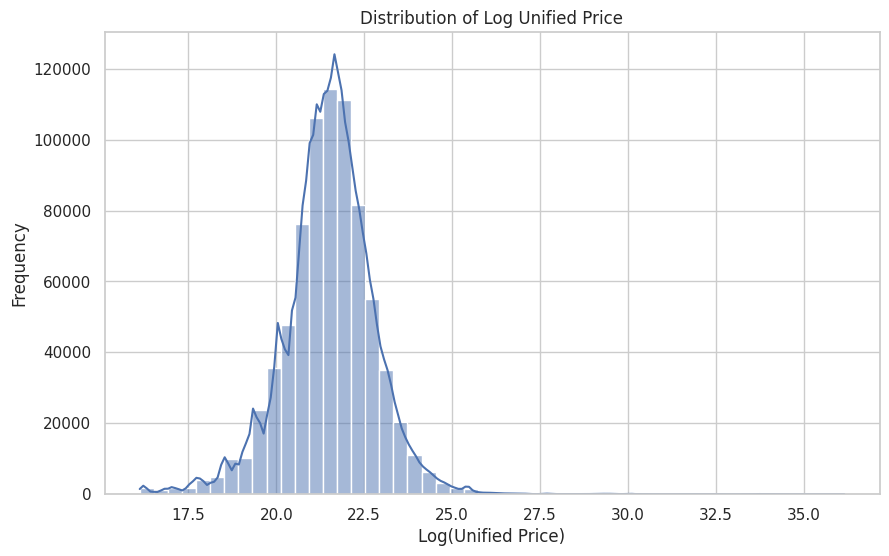

In [4]:
# Distribution of Log unified Price
plt.figure(figsize=(10, 6))
sns.histplot(df['log_unified_price'].dropna(), kde=True, bins=50)
plt.title("Distribution of Log Unified Price")
plt.xlabel("Log(Unified Price)")
plt.ylabel("Frequency")
plt.show()

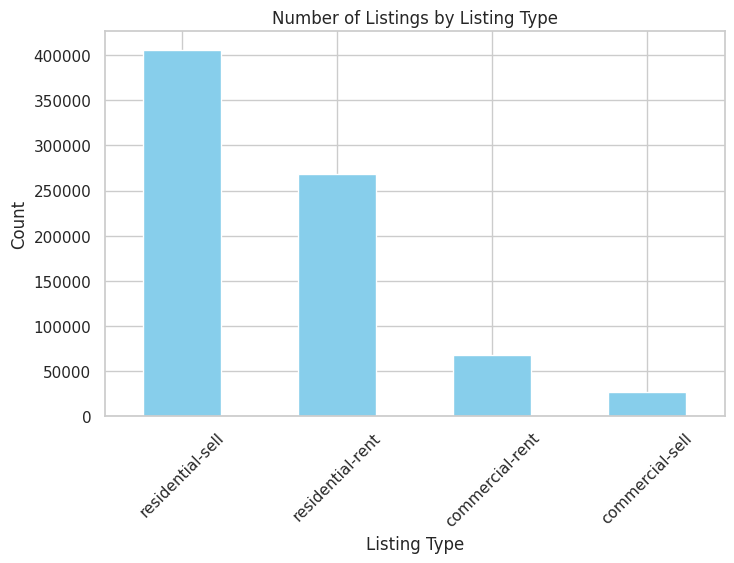

In [5]:
# Count of Listings by Listing Type
plt.figure(figsize=(8, 5))
df['listing_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Listings by Listing Type")
plt.xlabel("Listing Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

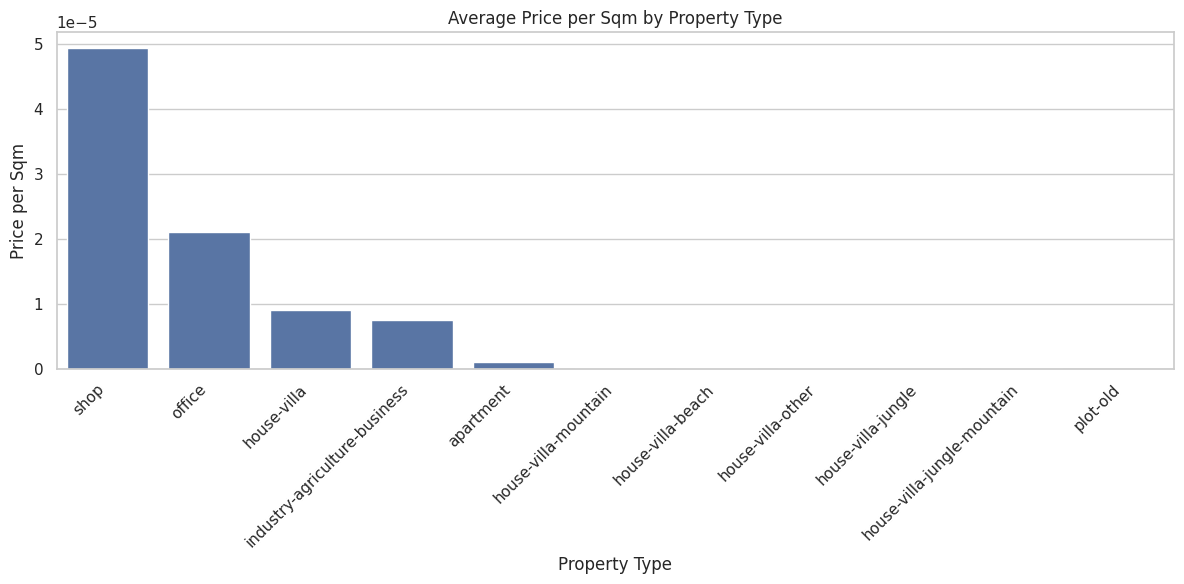

In [6]:
# Average Price per Sqm by Property Type
plt.figure(figsize=(12, 6))
avg_price_per_type = df.groupby('property_type')['price_per_sqm'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_type.index, y=avg_price_per_type.values)
plt.title("Average Price per Sqm by Property Type")
plt.ylabel("Price per Sqm")
plt.xlabel("Property Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

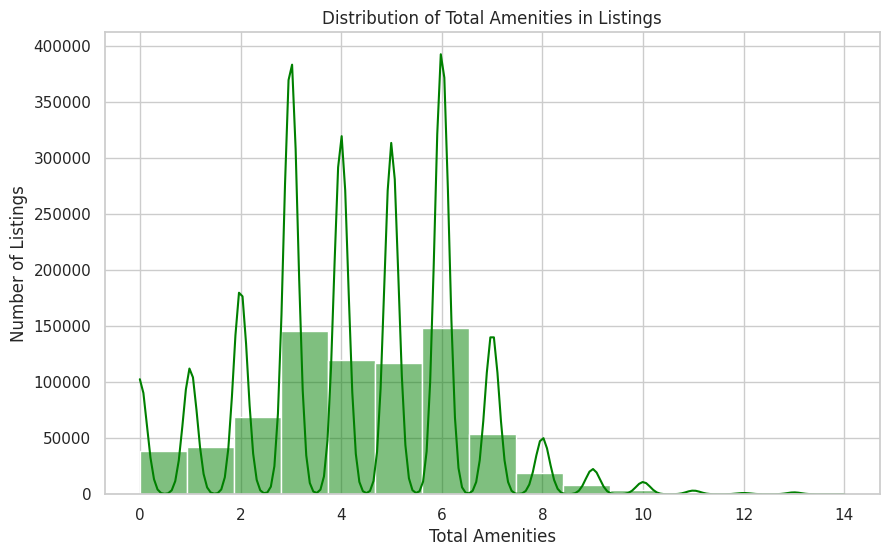

In [7]:
# Distribution of Total Amenities
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amenities'].dropna(), bins=15, kde=True, color='green')
plt.title("Distribution of Total Amenities in Listings")
plt.xlabel("Total Amenities")
plt.ylabel("Number of Listings")
plt.show()

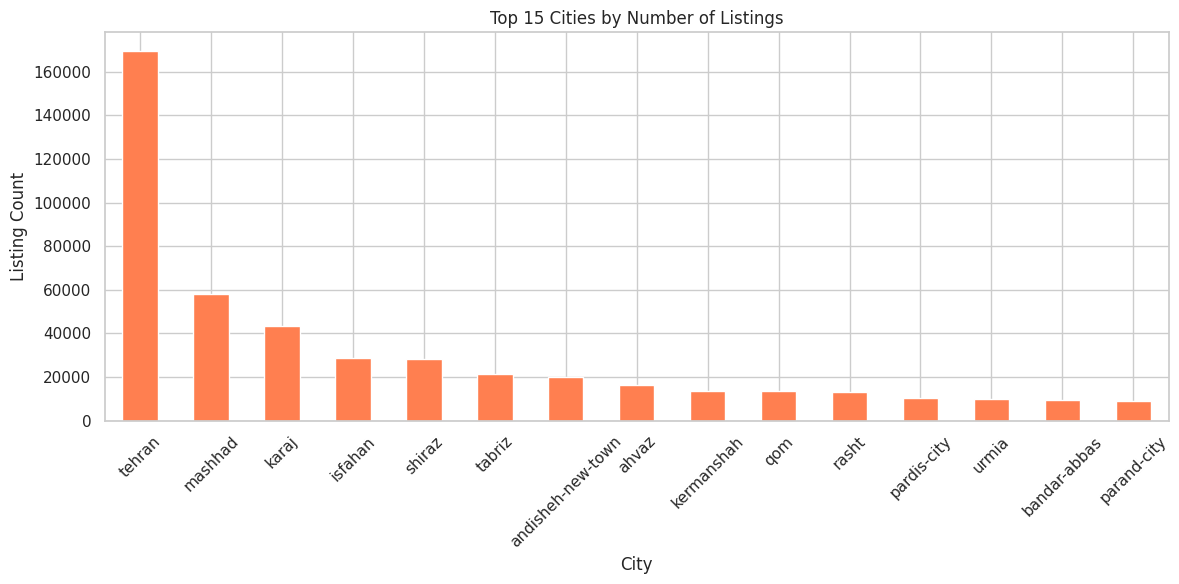

In [8]:
# Top Cities by Number of Listings
top_cities = df['city_slug'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='coral')
plt.title("Top 15 Cities by Number of Listings")
plt.xlabel("City")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

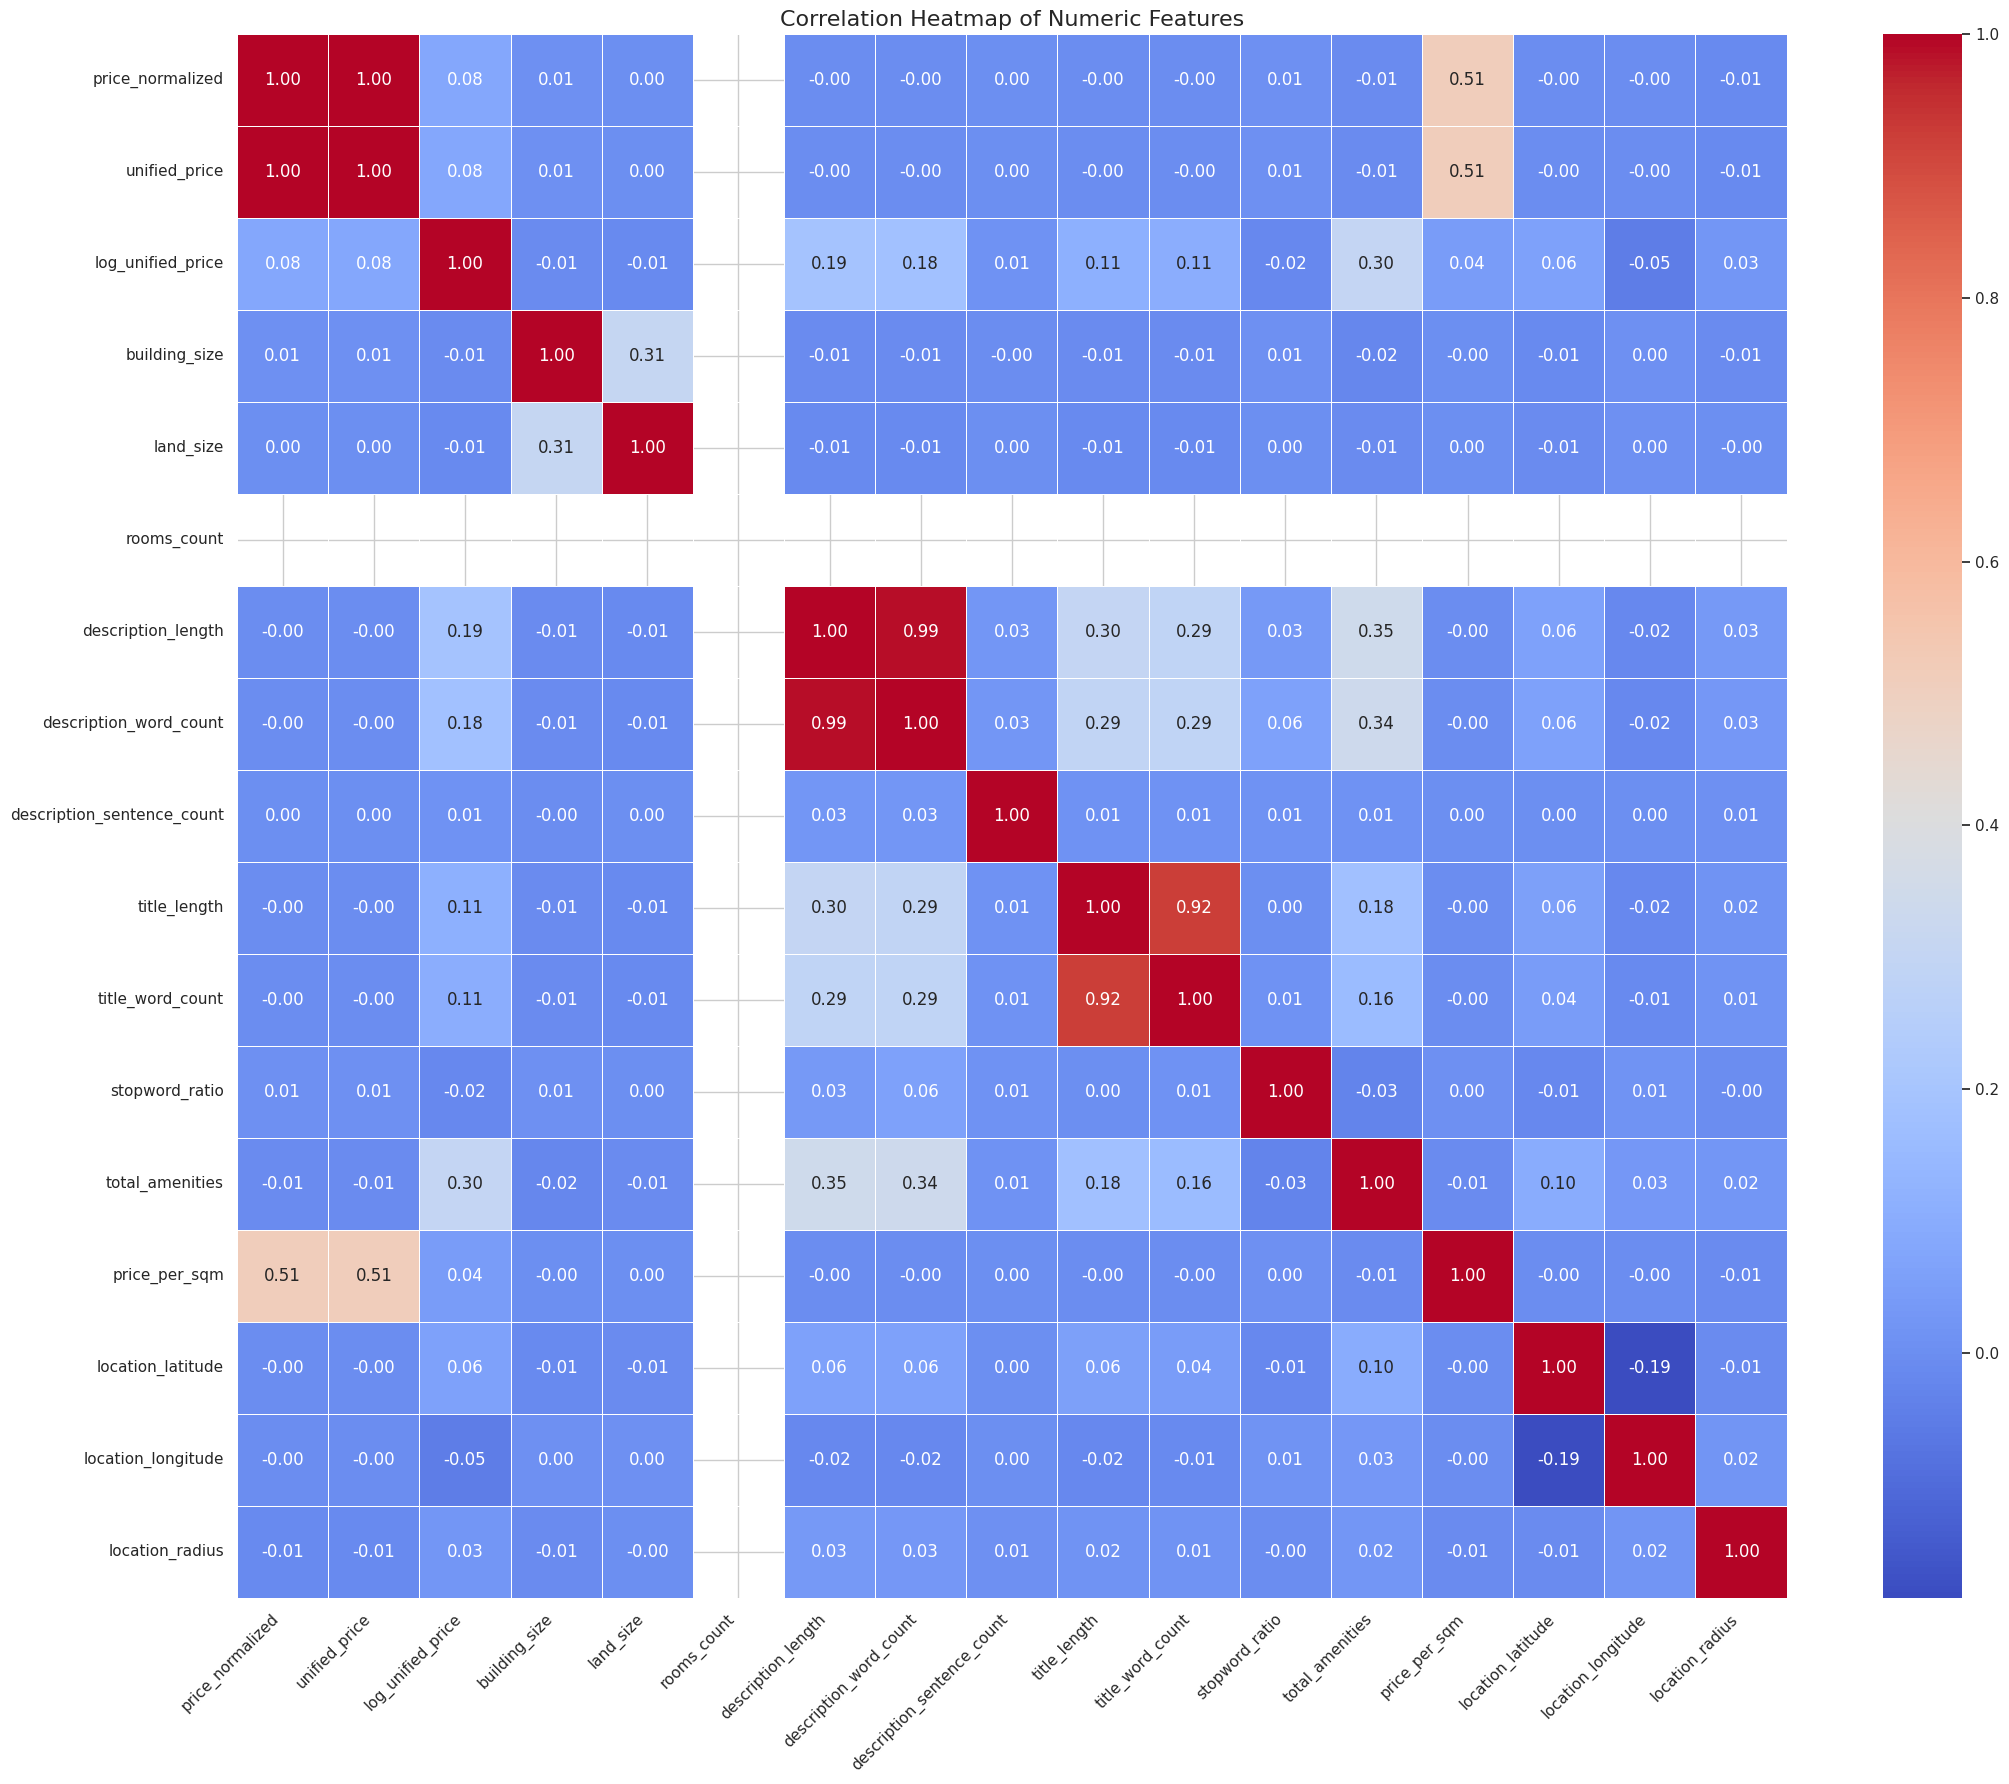

In [9]:
# Correlation Heatmap of Numeric Features
numeric_features = [
    'price_normalized', 'unified_price', 'log_unified_price',
    'building_size', 'land_size', 'rooms_count',
    'total_floors_count', 'unit_per_floor', 'floor',
    'description_length', 'description_word_count', 'description_sentence_count',
    'title_length', 'title_word_count', 'stopword_ratio',
    'total_amenities', 'price_per_sqm',
    'location_latitude', 'location_longitude', 'location_radius'
]

numeric_cols = df[numeric_features].select_dtypes(include=['number'])

plt.figure(figsize=(22, 18))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

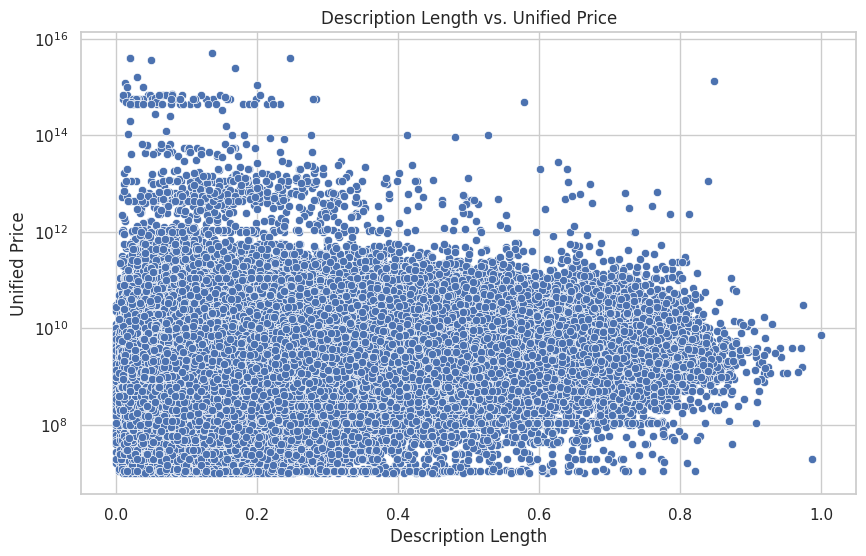

In [10]:
# Description Length vs. Unified Price (Log Scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['description_length'], y=df['unified_price'])
plt.title("Description Length vs. Unified Price")
plt.xlabel("Description Length")
plt.ylabel("Unified Price")
plt.yscale("log")

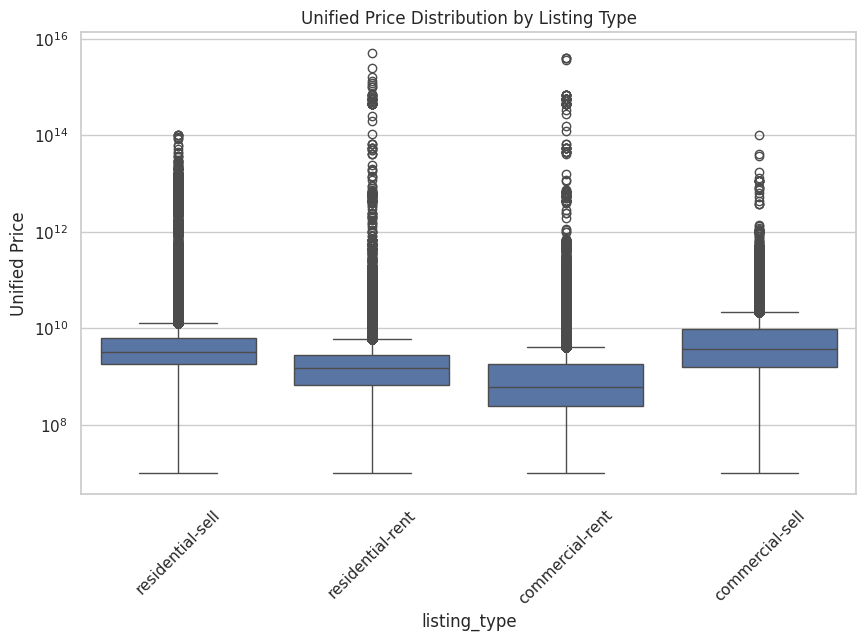

In [11]:
# Boxplot: Unified price by Listing Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='listing_type', y='unified_price')
plt.title("Unified Price Distribution by Listing Type")
plt.ylabel("Unified Price")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

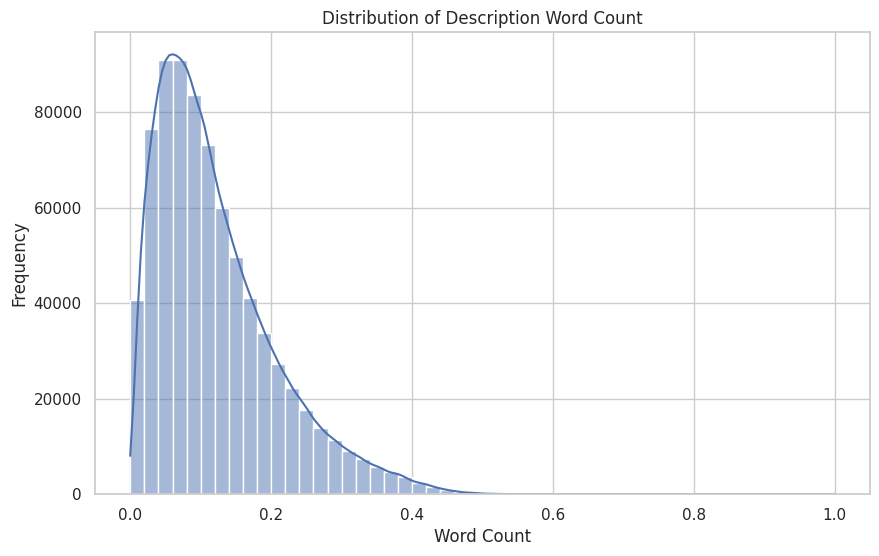

In [12]:
# Word Count in Descriptions
plt.figure(figsize=(10, 6))
sns.histplot(df['description_word_count'], kde=True, bins=50)
plt.title("Distribution of Description Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

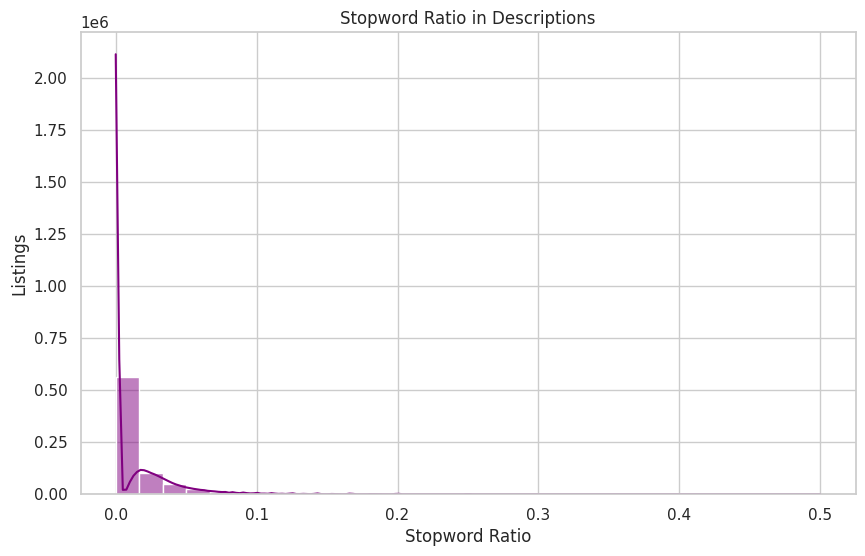

In [13]:
# Ratio of Stopwords in Descriptions
plt.figure(figsize=(10, 6))
sns.histplot(df['stopword_ratio'], bins=30, color='purple', kde=True)
plt.title("Stopword Ratio in Descriptions")
plt.xlabel("Stopword Ratio")
plt.ylabel("Listings")
plt.show()

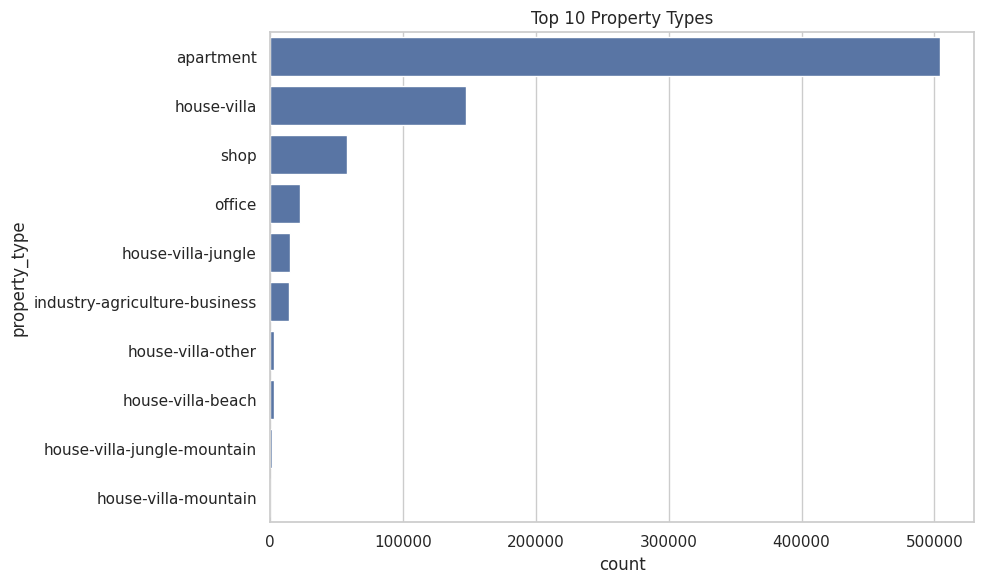

In [14]:
# Distribution of Property Types
plt.figure()
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts().head(10).index)
plt.title('Top 10 Property Types')
plt.tight_layout()
plt.show()


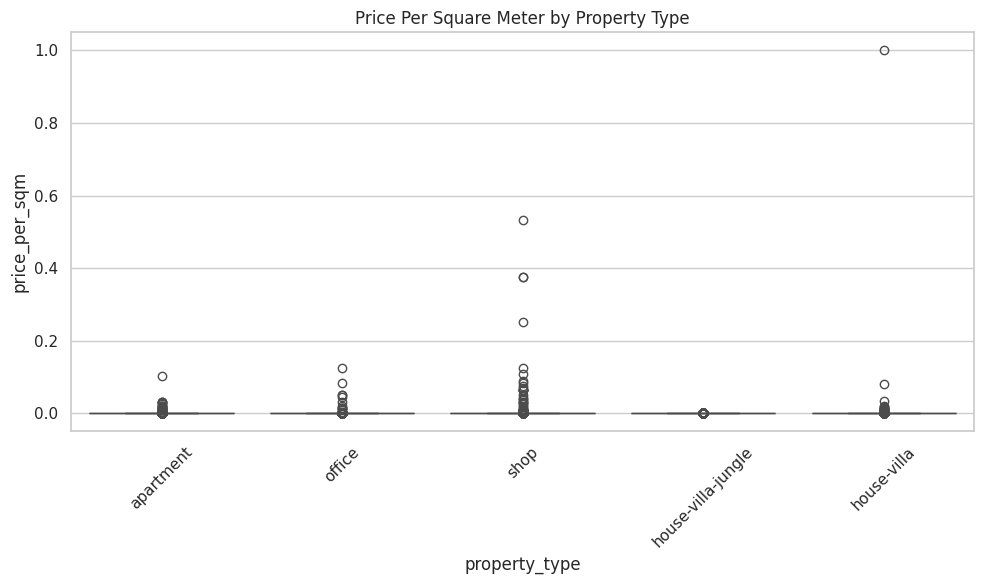

In [15]:
# Price Per Square Meter Boxplot by Property Type
plt.figure()
top_props = df['property_type'].value_counts().head(5).index
sns.boxplot(data=df[df['property_type'].isin(top_props)], x='property_type', y='price_per_sqm')
plt.title('Price Per Square Meter by Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

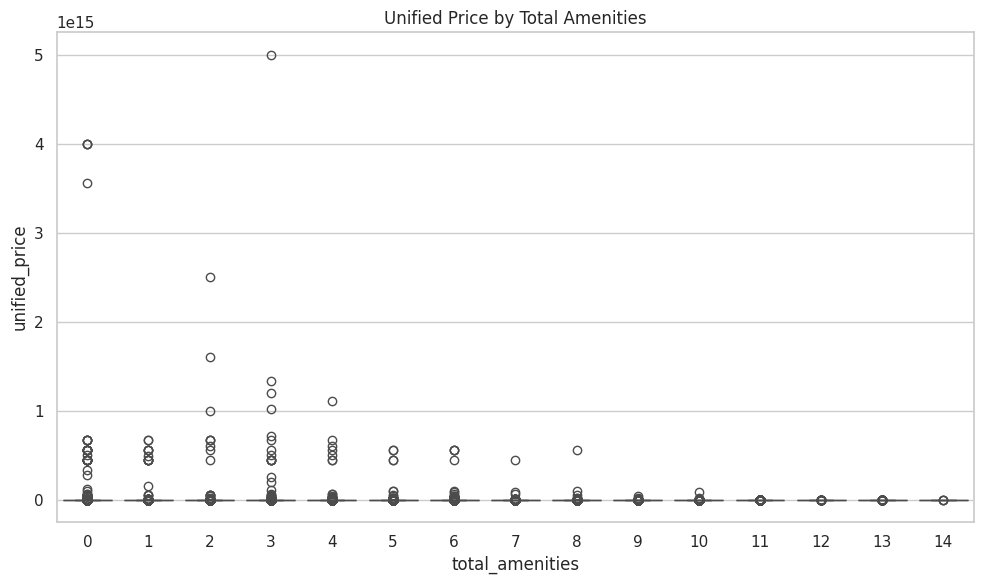

In [19]:
# Total Amenities vs. Price
plt.figure()
sns.boxplot(data=df, x='total_amenities', y='unified_price')
plt.title('Unified Price by Total Amenities')
plt.tight_layout()
plt.show()


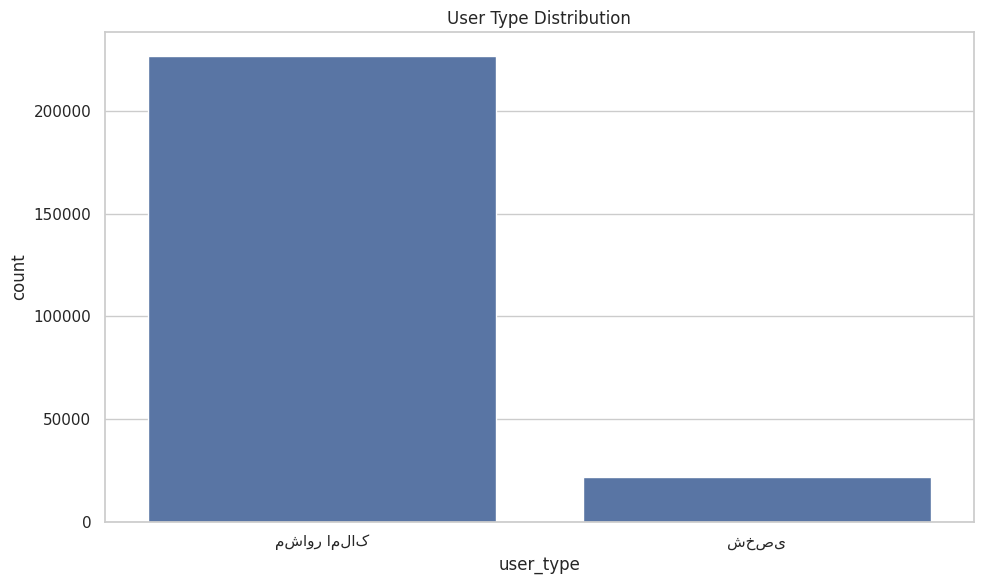

In [17]:
# User Type Distribution
if 'user_type' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='user_type', order=df['user_type'].value_counts().index)
    plt.title('User Type Distribution')
    plt.tight_layout()
    plt.show()

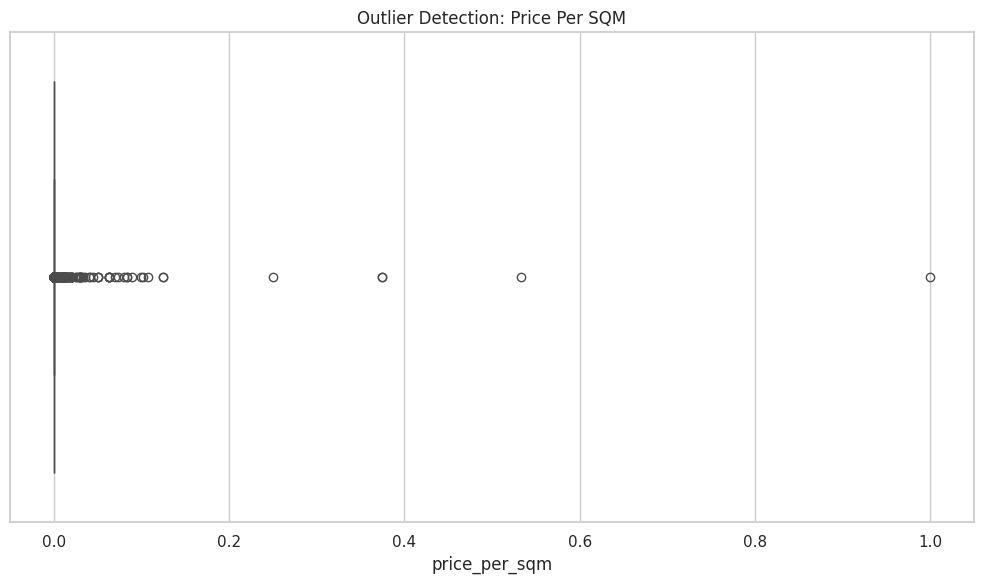

In [18]:
# Outlier Detection: Price Per SQM
plt.figure()
sns.boxplot(x=df['price_per_sqm'])
plt.title('Outlier Detection: Price Per SQM')
plt.tight_layout()
plt.show()